# PCA on satellite river data for classification using Naive Bayes
``` IRM2016003 Aditya Goel ```

In [13]:
from pathlib import Path
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import cv2

In [17]:
path = Path("river_images")
image = []
# Individual image channels have the same value and the 4th channel of each image is 255
for channel in path.iterdir():
    if channel.suffix == '.gif':
        img = plt.imread(channel)
        image.append(img[:,:,0])
image = np.array(image).transpose(1,2,0)
image.shape

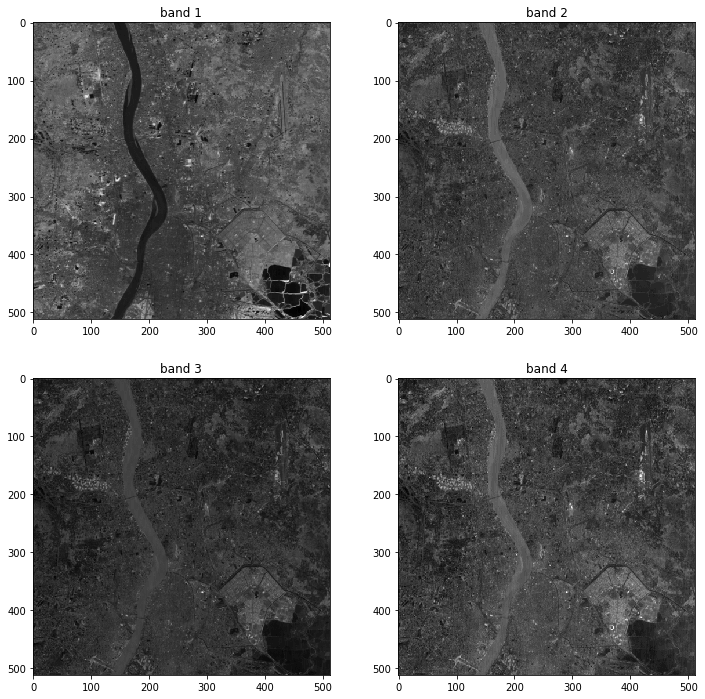

In [19]:
fig=plt.figure(figsize=(12, 12))
columns = 2
rows = 2
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.title(f"band {i+1}")
    plt.imshow(image[:,:,i], cmap="gray")
plt.show()

In [20]:
normalised_image = np.zeros((image[:,:,0].size,4))
for i in range(4):
    flattened_channel = image[:,:,i].flatten()  # covert 2d to 1d array 
    normalised_flattened_channel = (flattened_channel - flattened_channel.mean())/flattened_channel.std()  
    normalised_image[:,i] = normalised_flattened_channel
normalised_image.shape

(262144, 4)

### Calculating covariance matrix and eigenvalues and eigenvectors

In [21]:
covar = np.cov(normalised_image.transpose())
print("covariance matrix shape:", covar.shape)

eigen_values, eigen_vectors = np.linalg.eig(covar)
print("Eigenvalues:", eigen_values)
print("Eigenvalues:\n", eigen_vectors)

covariance matrix shape: (4, 4)
Eigenvalues: [2.78384193 0.95639654 0.07461428 0.18516251]
Eigenvalues:
 [[-0.16408144 -0.98321072 -0.07823874  0.01589556]
 [-0.5825856   0.03798026  0.78589802  0.20375433]
 [-0.55917287  0.097412   -0.21303844 -0.79526802]
 [-0.56656598  0.14954963 -0.57520225  0.57077165]]


### Ordering eigen terms

In [ ]:
order = eigen_values.argsort()[::-1]
eigen_values = eigen_values[order]
eigen_vectors = eigen_vectors[:,order]

### Projecting Pricipal Components

In [22]:
transformed_image = np.matmul(normalised_image, eigen_vectors)
transformed_image.shape

(262144, 4)

##### Information Retained by Principal Components

Text(0.5, 1.0, 'Information retention')

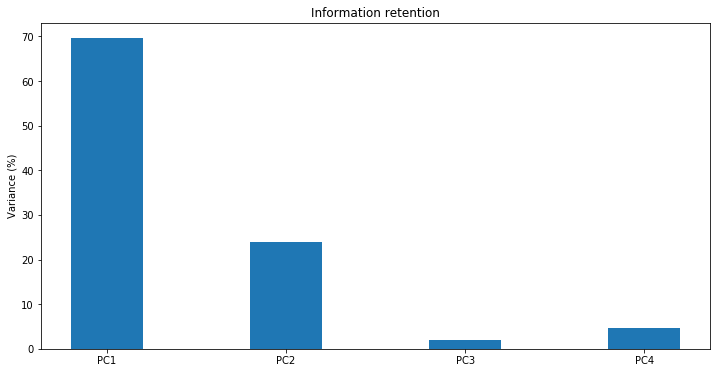

In [23]:
plt.figure(figsize=(12, 6))
plt.bar([1,2,3,4], eigen_values/sum(eigen_values)*100, align='center',width=0.4,
        tick_label = ['PC1','PC2','PC3','PC4'])
plt.ylabel('Variance (%)')
plt.title('Information retention')

### PCA to Images

In [24]:
pc_image = np.zeros(image.shape)
for i in range(4):
    pc_image[:,:,i] = transformed_image[:,i].reshape(image.shape[0], -1)
    
normalised_pc_image = np.zeros(image.shape)
for i in range(4):
    normalised_pc_image[:,:,i] = cv2.normalize(
                                    pc_image[:,:,i], 
                                    np.zeros(image.shape),
                                    0,255,cv2.NORM_MINMAX
                                )

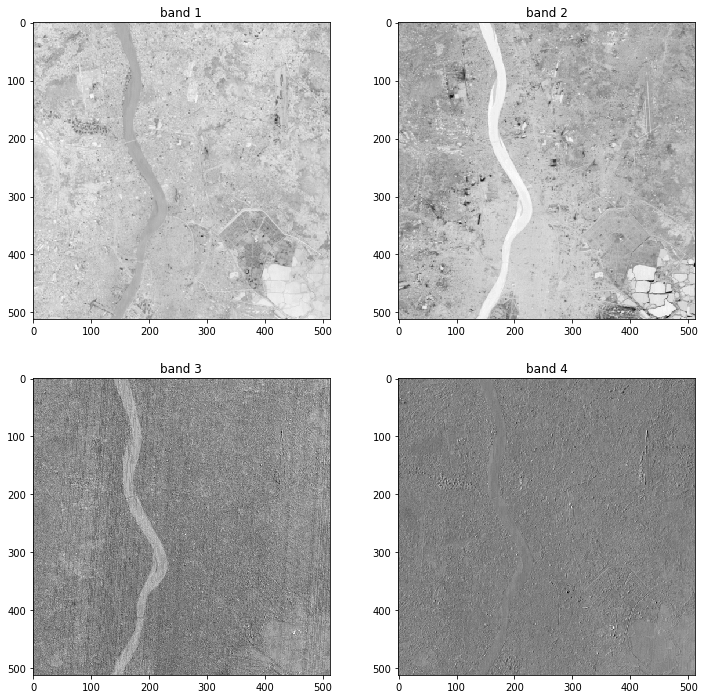

In [25]:
fig=plt.figure(figsize=(12, 12))
columns = 2
rows = 2
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.title(f"band {i+1}")
    plt.imshow(normalised_pc_image[:,:,i], cmap="gray")
plt.show()

-----------------

### PCA Ends here. Using Naive Bayes on new images (PC1 and PC2)

In [27]:
river_coords = [(158, 38), (159, 6), (153, 16), (154, 7), (163, 30), 
                     (167, 129), (171, 166), (217, 292), (160, 32), (213, 287), 
                     (159, 156), (163, 159), (185, 254), (216, 286), (173, 127), 
                     (162, 156), (186, 233), (170, 461), (150, 12), (159, 45), 
                     (186, 229), (164, 47), (211, 347), (218, 324), (228, 322), 
                     (156, 16), (179, 120), (151, 6), (173, 457), (145, 19), 
                     (186, 232), (185, 233), (181, 228), (213, 282), (159, 18),
                     (208, 292), (158, 20), (191, 247), (224, 314), (218, 344), 
                     (225, 313), (170, 34), (183, 233), (171, 128), (214, 287), 
                     (218, 351), (218, 280), (151, 7), (158, 9), (178, 120)]

non_river_coords = [(230, 83), (216, 214), (489, 163), (311, 85), 
                         (120, 402), (137, 430), (417, 307), (302, 49), 
                         (89, 436), (427, 425), (369, 244), (88, 374), 
                         (79, 227), (476, 43), (70, 296), (316, 70), (48, 118), 
                         (394, 366), (32, 411), (448, 215), (416, 113), 
                         (360, 333), (287, 24), (91, 235), (31, 383), 
                         (293, 109), (92, 402), (418, 444), (68, 261), 
                         (344, 420), (428, 245), (55, 438), (294, 149), 
                         (53, 416), (380, 245), (371, 66), (486, 18), (238, 55), 
                         (446, 411), (131, 226), (125, 271), (308, 100), 
                         (312, 336), (311, 208), (275, 253), (359, 444), 
                         (132, 387), (210, 123), (457, 340), (246, 108), 
                         (299, 334), (360, 365), (421, 375), (493, 445), 
                         (236, 158), (375, 355), (392, 377), (48, 233), 
                         (478, 75), (254, 441), (427, 103), (57, 404), 
                         (445, 308), (448, 313), (50, 96), (404, 83), (392, 49), 
                         (424, 173), (451, 185), (379, 406), (359, 458), 
                         (269, 460), (147, 253), (412, 464), (236, 98), 
                         (337, 478), (232, 471), (362, 327), (479, 240), 
                         (475, 489), (306, 239), (91, 425), (462, 452), 
                         (275, 65), (468, 173), (102, 441), (306, 478), 
                         (237, 149), (338, 475), (405, 90), (264, 289), 
                         (410, 198), (220, 150), (106, 168), (389, 147), 
                         (110, 95), (247, 457), (391, 93), (63, 414), 
                         (433, 197)]

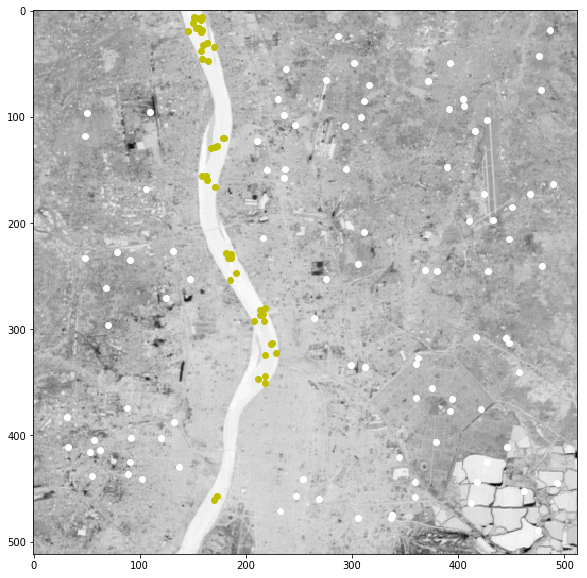

In [28]:
image = normalised_pc_image[:,:,:2]

image_strip = normalised_pc_image[:,:,1]

plt.figure(figsize=(10, 10))
plt.imshow(image_strip, cmap="gray")
plt.scatter(*zip(*river_coords), c="y")
plt.scatter(*zip(*non_river_coords), c="w")
plt.imshow(image_strip, cmap="gray")
plt.show()

### Mean of river class and non river class

In [29]:
def channel_mean(coords):
    tmp = []
    for coord in coords:
        tmp.append(image[coord[0], coord[1], :])
    return np.mean(tmp, axis=0)

T1 = channel_mean(river_coords)
T2 = channel_mean(non_river_coords)
T1, T2

(array([192.75514976, 184.10326694]), array([196.78606955, 184.30412113]))

### Covariance matrix for river class  

In [31]:
river_dev = []
non_river_dev = []

for i, j in river_coords:
    river_dev.append(image[i, j, :]- T1)
river_dev = np.array(river_dev)

for i, j in non_river_coords:
    non_river_dev.append(image[i, j, :]- T2)
non_river_dev = np.array(non_river_dev)

river_covar = []

In [32]:
for i in range(2):
    row_covar = []
    for j in range(2): 
        row_covar.append(river_dev[i, :] @ river_dev[j, :])
    river_covar.append(row_covar)

river_covar = np.array(river_covar)/ len(river_dev)

non_river_covar = []

for i in range(2):
    non_row_covar = []
    for j in range(2): 
        non_row_covar.append(non_river_dev[i, :] @ non_river_dev[j, :])
    non_river_covar.append(non_row_covar)

non_river_covar = np.array(non_river_covar)/ len(non_river_dev)

In [33]:
river_covar_inv = np.linalg.inv(river_covar)
non_river_covar_inv = np.linalg.inv(non_river_covar)

In [34]:
np.array([image[0, 0, :] - T1]).shape

(1, 2)

In [35]:
def predict(i, j):
    river_norm = (image[i, j, :] - T1).reshape(2,1)
    non_river_norm = (image[i, j, :] - T2).reshape(2,1)
    
    river_class = river_norm.T @ river_covar_inv @ river_norm
    non_river_class = non_river_norm.T @ non_river_covar_inv @ non_river_norm
    
    river_covar_det = np.linalg.det(river_covar)
    p1 = -0.5 / np.sqrt(river_covar_det) * np.exp(river_class)

    non_river_covar_det = np.linalg.det(non_river_covar)
    p2 = -0.5 / np.sqrt(non_river_covar_det) * np.exp(non_river_class)

    return p1, p2  

predict(12,120)

(array([[-3.93203517e+66]]), array([[-1.23088358e+100]]))

### Bayes 

In [36]:
def bayes(fact1, fact2):
    res = np.zeros((512, 512))
    for i in range(512):
        for j in range(512):
            p1, p2 = predict(i, j)
            if fact1 * p1 > fact2 * p2: res[i, j] = 0
            else: res[i, j] = 255
    return res

### Final output

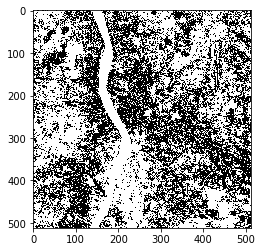

In [38]:
img1 = bayes(0.3, 0.7)
plt.imshow(img1, cmap='gray')

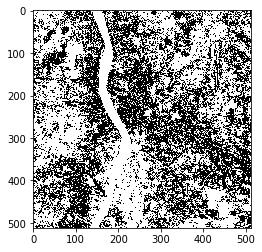

In [39]:
img2 = bayes(0.5, 0.5)
plt.imshow(img2, cmap='gray')

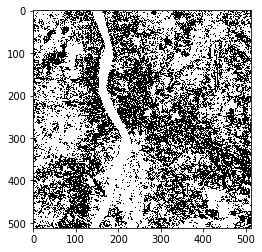

In [40]:
img3 = bayes(0.7, 0.3)
plt.imshow(img3, cmap='gray')

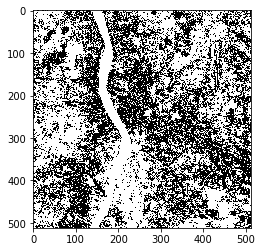

In [42]:
img5 = bayes(0.9, 0.1)
plt.imshow(img5, cmap='gray')

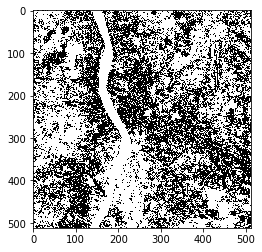

In [43]:
img6 = bayes(0.95, 0.05)
plt.imshow(img6, cmap='gray')

--------------